In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (
    ModelSpec as MS,
    summarize,
    poly,
)


In [3]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [5]:
X = pd.DataFrame({
    'intercept': np.ones(Boston.shape[0]),
    'lstat': Boston['lstat']    
})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [6]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [7]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [8]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [9]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           5.08e-88
Time:                        21:59:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [12]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [13]:
new_predictions = results.get_prediction(newX)

In [14]:
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [15]:
new_predictions.conf_int(alpha=0.5)

array([[29.53006154, 30.07712669],
       [24.85435487, 25.25233981],
       [20.10675447, 20.49944667]])

In [16]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [17]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

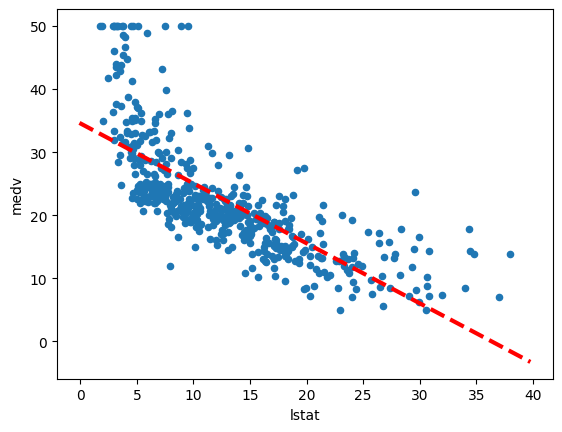

In [18]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(
    ax,
    results.params[0],
    results.params[1],
    'r--',
    linewidth=3)

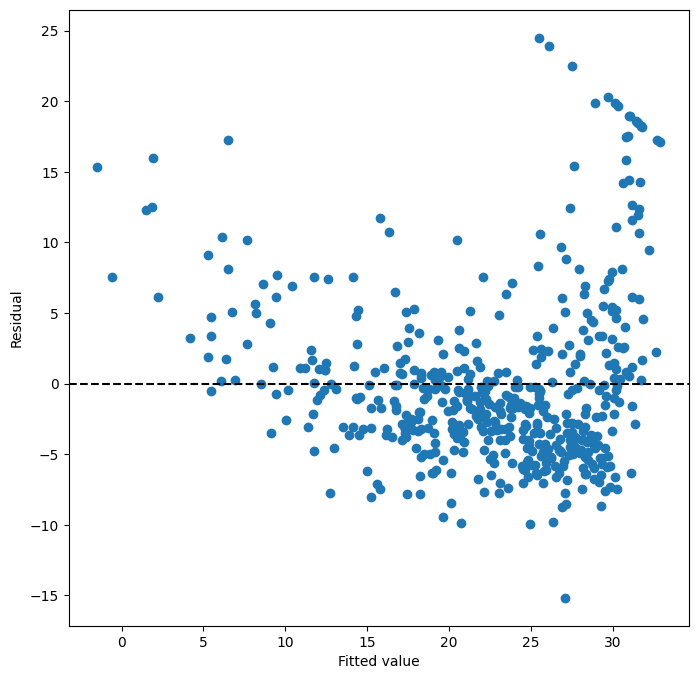

In [19]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

374

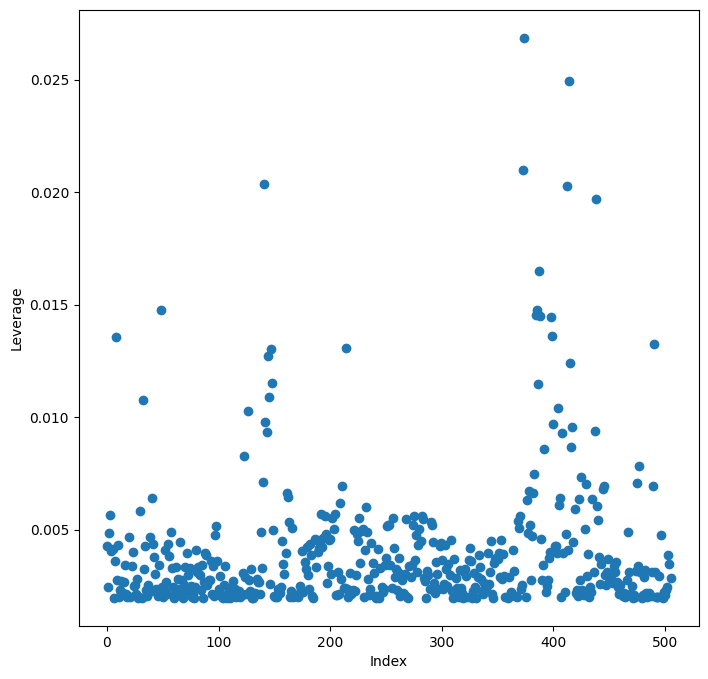

In [20]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [21]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [22]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [23]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [24]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [25]:
np.sqrt(results.scale)

4.798034335596367

In [26]:
results.rsquared

0.7343070437613076

In [27]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif': vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [28]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [29]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [30]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


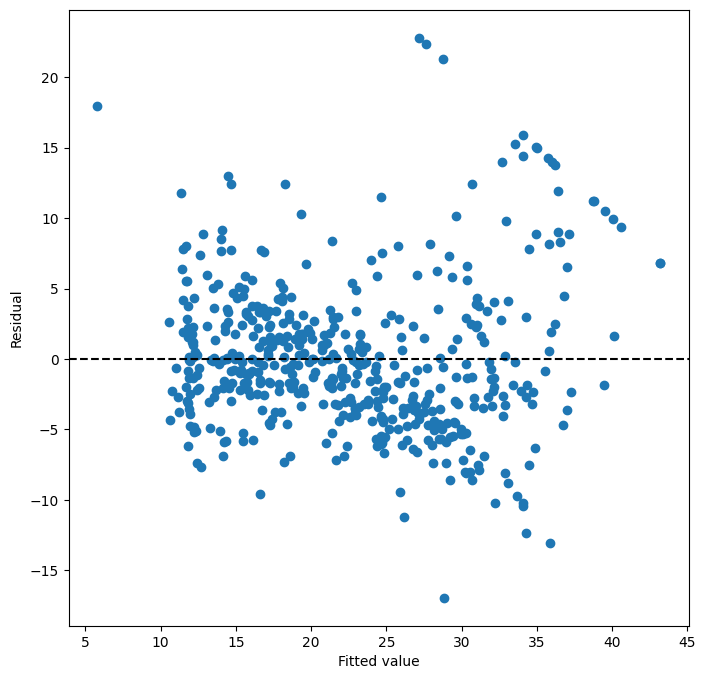

In [31]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [32]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [33]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


# Questions

## Question 8

In [34]:
Auto = load_data('Auto')
X = MS(['horsepower']).fit_transform(Auto)
y = Auto['mpg']

auto_model_1 = sm.OLS(y, X)
auto_results_1 = auto_model_1.fit()
summarize(auto_results_1)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


i) Yes there is likely to be a relationship between the predictor and response as the p value is small

ii) The relationship is strong, the standard error is low and the p value and t stat significant

iii) The relationship is negative

iv) 

In [35]:
newX = MS(['horsepower']).fit_transform(pd.DataFrame({'horsepower': [98]}))

In [36]:
auto_results_1.get_prediction(newX).dist.ppf(1 - 0.05 / 2., df=390)

1.9660653313010235

In [37]:
auto_results_1.cov_params()

,intercept,horsepower
intercept,0.514804,-0.004340
horsepower,-0.004340,0.000042


In [38]:
auto_results_1.get_prediction(newX).predicted_mean + auto_results_1.get_prediction(newX).dist.ppf(1 - 0.05 / 2., df=390)*np.sqrt(newX @ auto_results_1.cov_params() @ newX.T)

,0
0,24.961075


In [39]:
auto_results_1.get_prediction(newX).predicted_mean

array([24.46707715])

In [40]:
auto_results_1.get_prediction(newX).conf_int(obs=False, alpha=0.05)

array([[23.97307896, 24.96107534]])

In [41]:
auto_results_1.get_prediction(newX).conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

In [44]:
np.sqrt((0.1578-0.1451)*24.5 + np.var(auto_results_1.resid))

4.924917556528547

In [45]:
auto_results_1.conf_int()

,0,1
intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [46]:
auto_results_1.get_prediction(X)

In [47]:
auto_results_1.get_prediction(newX).predicted_mean - 1.64*np.sqrt(np.var(y))

array([11.6832021])

In [48]:
auto_results_1.get_prediction(newX).predicted_mean - 1.64*np.sqrt(np.var(auto_results_1.get_prediction(X).predicted_mean) + np.var(auto_results_1.resid))

array([11.6832021])

In [49]:
np.var(auto_results_1.get_prediction(X).predicted_mean)

36.819075503712604

In [50]:
auto_results_1.get_prediction(newX).conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

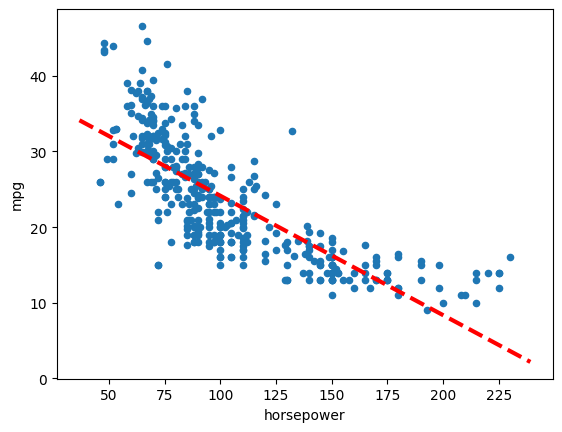

In [51]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(
    ax,
    auto_results_1.params[0],
    auto_results_1.params[1],
    'r--',
    linewidth=3)

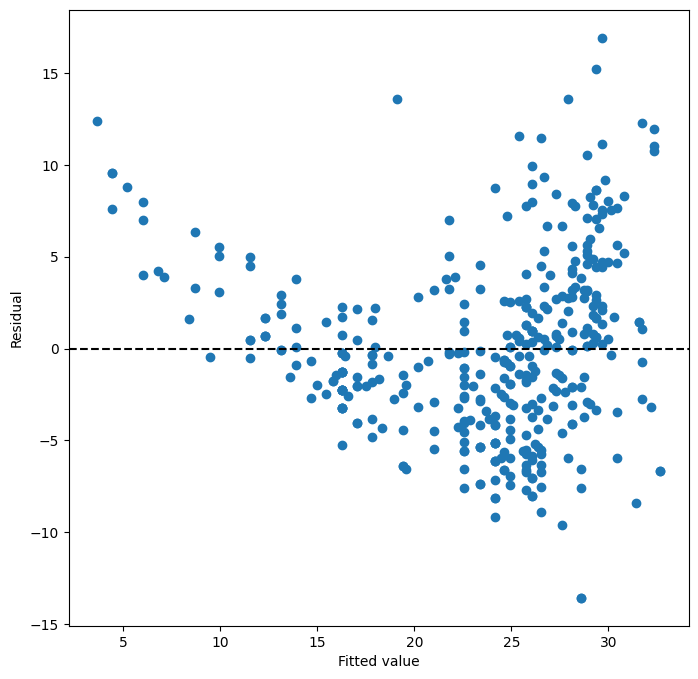

In [53]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(auto_results_1.fittedvalues , auto_results_1.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

There appears to be higher residuals at the extremes of the fitted values, suggesting the relationship might not be linear 

## Question 9

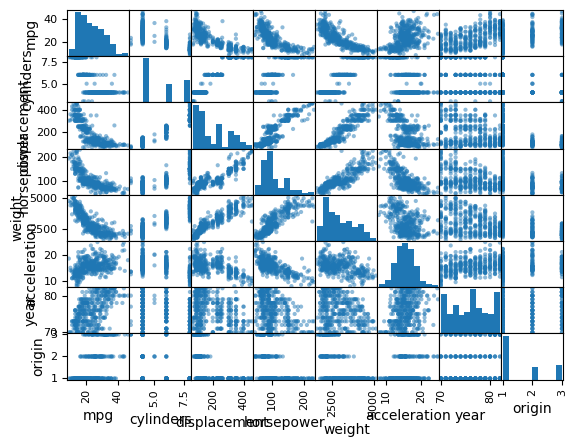

In [54]:
pd.plotting.scatter_matrix(Auto);

In [55]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [56]:
Auto.columns.drop(['name', 'mpg'])

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [57]:
terms_auto_results_2 = Auto.columns.drop(['name', 'mpg'])
X = MS(terms_auto_results_2).fit_transform(Auto)
model_2 = sm.OLS(y, X)
auto_results_2 = model_2.fit()
summarize(auto_results_2)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [58]:
anova_lm(auto_results_1, auto_results_2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


ValueError: x and y must be the same size

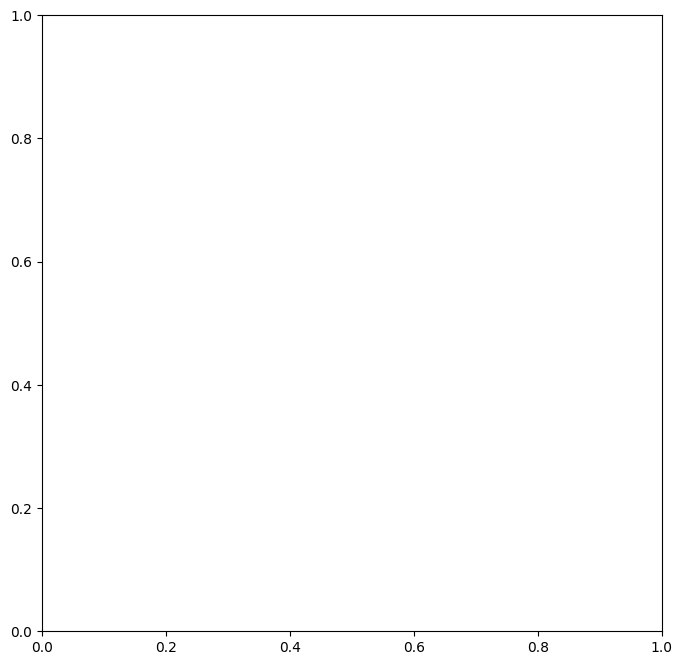

In [59]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(auto_results_2.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

13

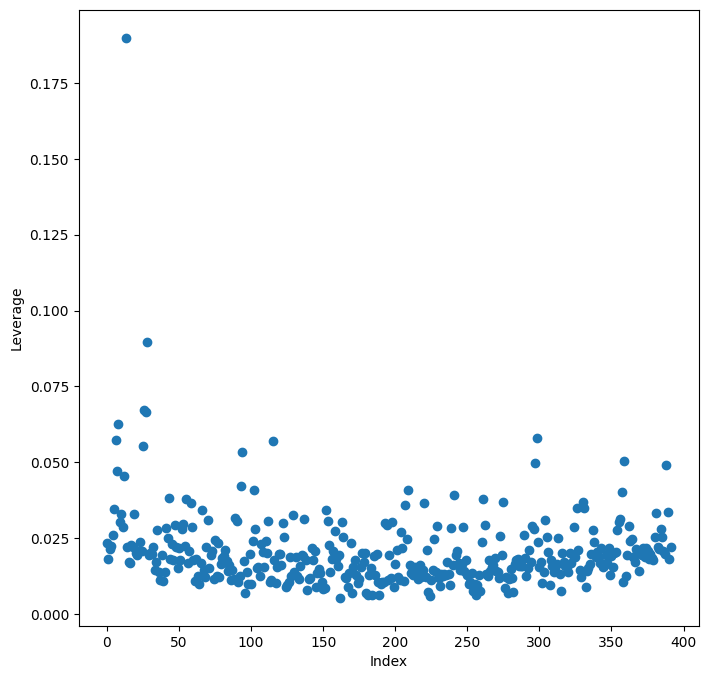

In [60]:
infl = auto_results_2.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [61]:
X = MS(['horsepower', 'acceleration', ('acceleration','horsepower')]).fit_transform(Auto)
model_3 = sm.OLS(y, X)
auto_results_3 = model_3.fit()
summarize(auto_results_3)

,coef,std err,t,P>|t|
intercept,33.5124,3.420,9.798,0.000
horsepower,0.0176,0.027,0.641,0.522
acceleration,0.8003,0.212,3.777,0.000
acceleration:horsepower,-0.0157,0.002,-7.838,0.000


In [62]:
summarize(auto_results_1)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [63]:
anova_lm(auto_results_1, auto_results_3, auto_results_2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,388.0,7601.330520,2.0,1784.585352,80.579318,5.394833e-30
2,384.0,4252.212530,4.0,3349.117989,75.611302,3.131210e-47


In [64]:
X = MS(['horsepower', 'cylinders', ('cylinders','horsepower')]).fit_transform(Auto)
model_4 = sm.OLS(y, X)
auto_results_4 = model_4.fit()
summarize(auto_results_4)

,coef,std err,t,P>|t|
intercept,72.8151,3.071,23.708,0.0
horsepower,-0.4160,0.035,-12.051,0.0
cylinders,-6.4925,0.511,-12.716,0.0
cylinders:horsepower,0.0472,0.005,9.984,0.0


In [65]:
anova_lm(auto_results_1, auto_results_2, auto_results_3, auto_results_4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,51.057156,4.606732e-46
2,388.0,7601.330520,-4.0,-3349.117989,49.962891,NaN
3,388.0,6502.114636,-0.0,1099.215884,-inf,NaN


In [66]:
X = MS([poly('horsepower', degree=2)]).fit_transform(Auto)
model_5 = sm.OLS(y, X)
auto_results_5 = model_5.fit()
summarize(auto_results_5)

,coef,std err,t,P>|t|
intercept,23.4459,0.221,106.130,0.0
"poly(horsepower, degree=2)[0]",-120.1377,4.374,-27.467,0.0
"poly(horsepower, degree=2)[1]",44.0895,4.374,10.080,0.0


In [67]:
anova_lm(auto_results_1, auto_results_2, auto_results_3, auto_results_4, auto_results_5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,44.723701,2.086887e-41
2,388.0,7601.330520,-4.0,-3349.117989,43.765176,NaN
3,388.0,6502.114636,-0.0,1099.215884,-inf,NaN
4,389.0,7442.029412,-1.0,-939.914776,49.129992,NaN


# Carseats

In [68]:
Carseats = load_data('Carseats')

In [69]:
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
y = Carseats['Sales']
model_carseats = sm.OLS(y, X)
carseats_results_1 = model_carseats.fit()
summarize(carseats_results_1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


b) 
- intercept is for 0 price, urban and US we would expect 13 sales
- As price increases sales decrease, for a unit increase in price there is a -0.05 decrease in sales
- If its urban then we expect less sales by -0.02
- If its US then sales are more by 1.2

c) sales = 13.0435 -0.0545 * Price - 0.0219 * (if urban) + 1.2006 * (if US)

d) Price, intercept and US

In [70]:
X = MS(['Price', 'US']).fit_transform(Carseats)
y = Carseats['Sales']
model_carseats_2 = sm.OLS(y, X)
carseats_results_2 = model_carseats_2.fit()
summarize(carseats_results_2)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [71]:
anova_lm(carseats_results_1, carseats_results_2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


In [72]:
carseats_results_2.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


42

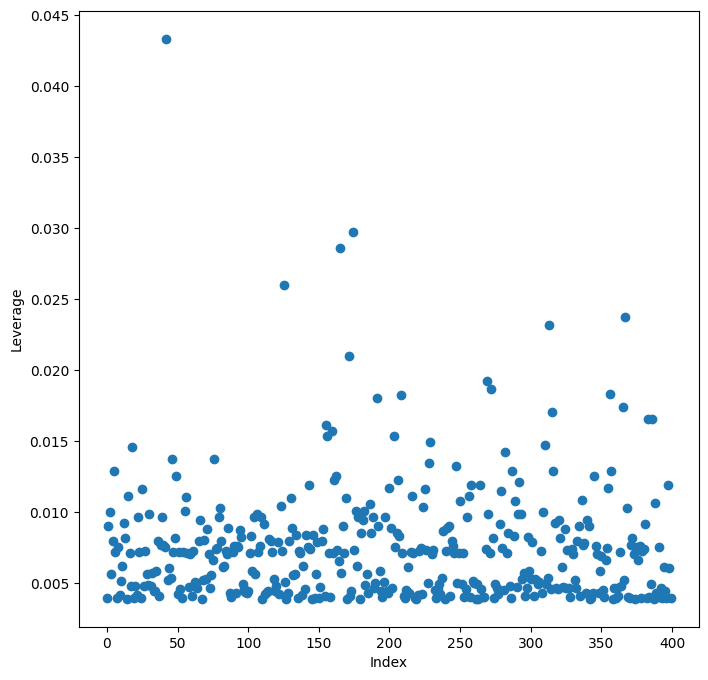

In [73]:
infl = carseats_results_2.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

h) There is an outlier

# Question 11

In [74]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [75]:
model_rand = sm.OLS(y, x)
rand_results = model_rand.fit(intercept=False)
summarize(rand_results)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


a) values make sense given model is generating y from x

In [76]:
model_rand = sm.OLS(x, y)
rand_results = model_rand.fit(intercept=False)
summarize(rand_results)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


c)
- t stat and p value are the same
- std error is the same proportionate to the coefficient as below
- coef true value is 2/5 for second, and 2 for first

In [77]:
0.022/0.3757

0.05855735959542188

In [78]:
0.117/1.9762

0.059204533954053236

d) Showing that this is symmetrical in x and y and hence we have the same t-stat




In [79]:
n = len(x)
np.sqrt(n-1)*(x * y).sum()/np.sqrt((x*x).sum() * (y*y).sum() - ((x*y).sum()**2))

16.898417063035094

e) The equation is symmetrical and therefore its the same x onto y, y onto x

In [80]:
model_rand = sm.OLS(y, x)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


In [81]:
X = MS(['x']).fit_transform(pd.DataFrame({'x': x}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit()
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x,1.9686,0.118,16.734,0.000


In [82]:
Y = MS(['y']).fit_transform(pd.DataFrame({'y': y}))
model_rand = sm.OLS(x, Y)
rand_results = model_rand.fit()
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y,0.3763,0.022,16.734,0.000


# Question 12

a) for the regression coefficient of x onto y and y onto x to be the same you need that the variance of x is equal to the vairance of y

In [83]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [84]:
model_rand = sm.OLS(y, x)
rand_results = model_rand.fit(intercept=False)
summarize(rand_results)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


In [85]:
model_rand = sm.OLS(x, y)
rand_results = model_rand.fit(intercept=False)
summarize(rand_results)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


In [86]:
rng = np.random.default_rng(1)
z = rng.normal(size=100)
x = z + rng.normal(size=100)
y = z + rng.normal(size=100)

In [87]:
model_rand = sm.OLS(y, x)
rand_results = model_rand.fit(intercept=False)
summarize(rand_results)

,coef,std err,t,P>|t|
x1,0.4236,0.088,4.813,0.0


In [88]:
model_rand = sm.OLS(x, y)
rand_results = model_rand.fit(intercept=False)
summarize(rand_results)

,coef,std err,t,P>|t|
x1,0.4476,0.093,4.813,0.0


# Question 13

In [89]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
eps = rng.normal(size=100, scale=0.05)
y = - 1 + 0.5 * x + eps

The size of y is 100, beta0 is -1 and beta1 is 0.5

In [90]:
Y = MS(['y']).fit_transform(pd.DataFrame({'y': y}))
model_rand = sm.OLS(x, Y)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,1.9858,0.026,75.584,0.0
y,1.9793,0.023,84.739,0.0


In [91]:
X = MS(['x']).fit_transform(pd.DataFrame({'x': x}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,-1.0038,0.005,-199.662,0.0
x,0.4984,0.006,84.739,0.0


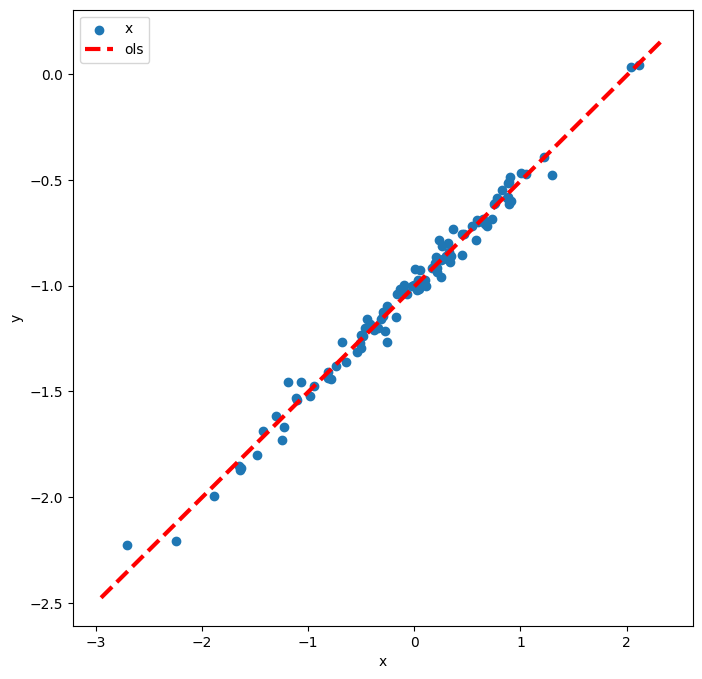

In [92]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x, y, label='x')
ax.set_xlabel('x')
ax.set_ylabel('y')
abline(
    ax,
    rand_results.params[0],
    rand_results.params[1],
    'r--',
    linewidth=3,
    label='ols'
)
ax.legend()

e) The coefficients for beta hat 0 and 1 are very close to the actual values

In [93]:
X = MS([poly('x', degree=2)]).fit_transform(pd.DataFrame({'x': x}))
model_rand_poly = sm.OLS(y, X)
rand_results_poly = model_rand_poly.fit(intercept=True)
summarize(rand_results_poly)

,coef,std err,t,P>|t|
intercept,-1.0405,0.005,-206.672,0.000
"poly(x, degree=2)[0]",4.2444,0.050,84.306,0.000
"poly(x, degree=2)[1]",-0.0026,0.050,-0.052,0.959


In [94]:
anova_lm(rand_results, rand_results_poly)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,0.245866,0.0,NaN,NaN,NaN
1,97.0,0.245859,1.0,0.000007,0.002688,0.958757


g) f stat is quite low therefore indicates the polynomial doesn't add much value

In [95]:
rng = np.random.default_rng(1)
x_1 = rng.normal(size=100)
eps_1 = rng.normal(size=100, scale=0.005)
y_1 = - 1 + 0.5 * x_1 + eps_1

X_1 = MS(['x']).fit_transform(pd.DataFrame({'x': x_1}))
model_rand_less = sm.OLS(y_1, X_1)
rand_results_less = model_rand_less.fit(intercept=True)
summarize(rand_results_less)

,coef,std err,t,P>|t|
intercept,-1.0004,0.001,-1989.814,0.0
x,0.4998,0.001,849.789,0.0


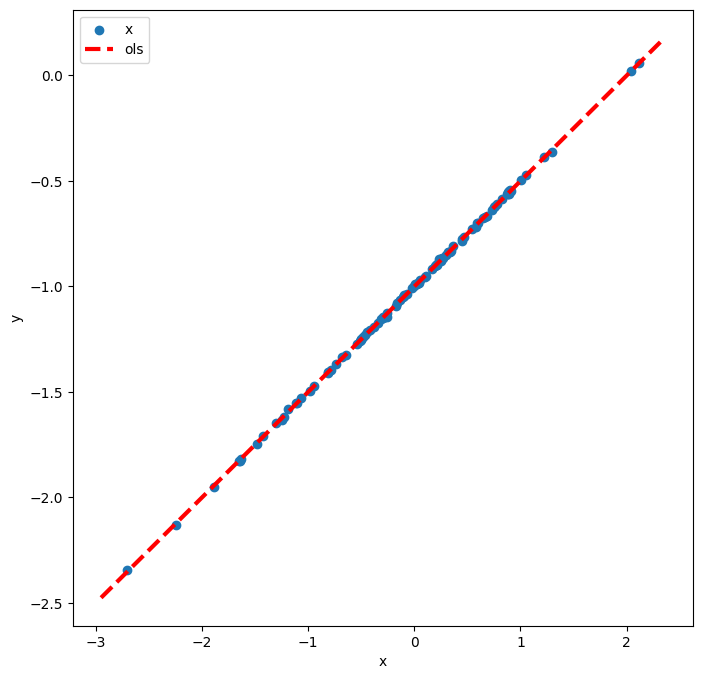

In [96]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x_1, y_1, label='x')
ax.set_xlabel('x')
ax.set_ylabel('y')
abline(
    ax,
    rand_results_less.params[0],
    rand_results_less.params[1],
    'r--',
    linewidth=3,
    label='ols'
)
ax.legend()

h) adding less noise increases t-stat, make coefficients closer to true values

In [97]:
rng = np.random.default_rng(1)
x_2 = rng.normal(size=100)
eps_2 = rng.normal(size=100, scale=0.5)
y_2 = - 1 + 0.5 * x_2 + eps_2

X_2 = MS(['x']).fit_transform(pd.DataFrame({'x': x_2}))
model_rand_more = sm.OLS(y_2, X_2)
rand_results_more = model_rand_more.fit(intercept=True)
summarize(rand_results_more)

,coef,std err,t,P>|t|
intercept,-1.0380,0.050,-20.647,0.0
x,0.4843,0.059,8.233,0.0


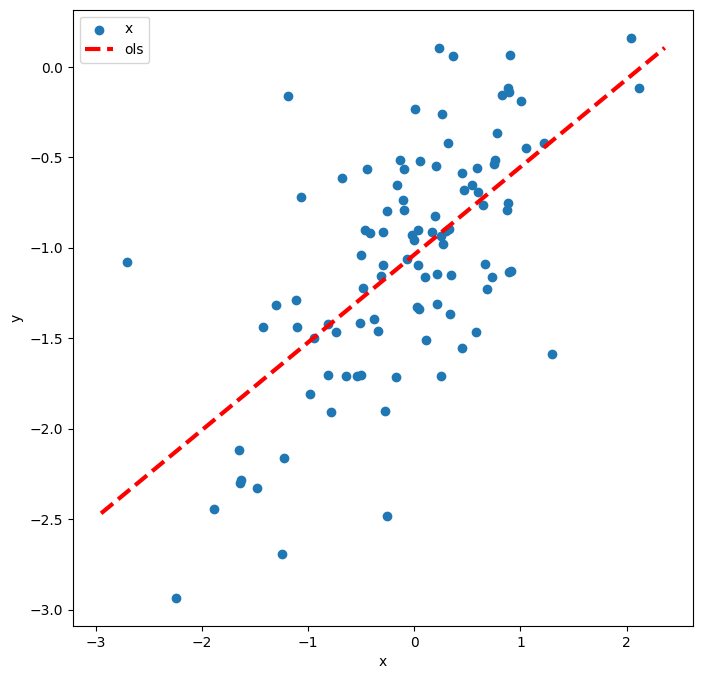

In [98]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x_2, y_2, label='x')
ax.set_xlabel('x')
ax.set_ylabel('y')
abline(
    ax,
    rand_results_more.params[0],
    rand_results_more.params[1],
    'r--',
    linewidth=3,
    label='ols'
)
ax.legend()

i) adding more noise decreases t-stat, make coefficients further away from true values

In [99]:
rand_results_more.conf_int()

,0,1
intercept,-1.137782,-0.938244
x,0.367565,0.601017


In [100]:
rand_results_less.conf_int()

,0,1
intercept,-1.001378,-0.999382
x,0.498676,0.501010


In [101]:
rand_results.conf_int()

,0,1
intercept,-1.013778,-0.993824
x,0.486757,0.510102


# Question 14

In [102]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

y = 2 + 2 * x1 + 0.3 * x2

In [103]:
df = pd.DataFrame({'x1': x1, 'x2': x2})

In [104]:
df.corr()

,x1,x2
x1,1.000000,0.772324
x2,0.772324,1.000000


Text(0, 0.5, 'x2')

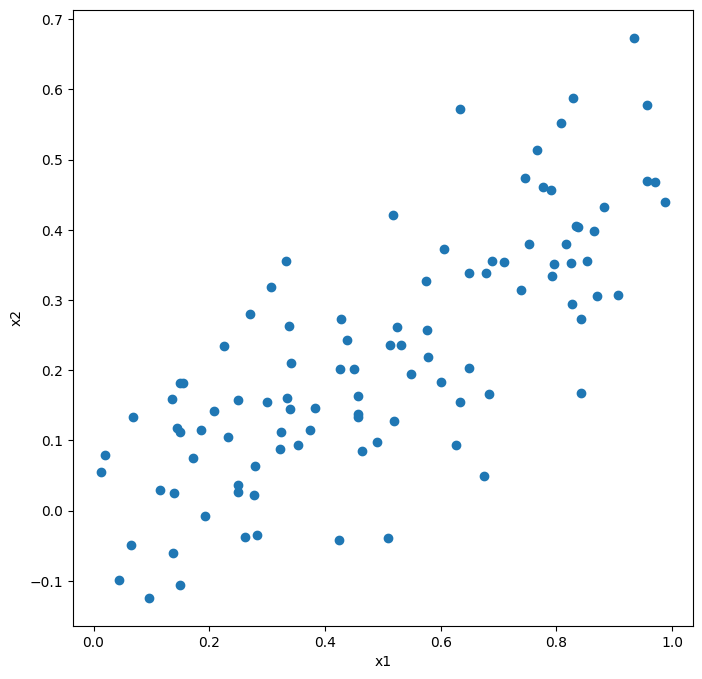

In [105]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x1, x2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [106]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X = MS(['x1', 'x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


c) intercept is quite good but the coefficients for 1 and 2 are not that great. We can reject the null hypothesis for x1 but not x2 

In [107]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X = MS(['x1']).fit_transform(pd.DataFrame({'x1': x1}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


In [108]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X = MS(['x2']).fit_transform(pd.DataFrame({'x2': x2}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


f) When you do the seperate regressions then you would reject the null hypothesis of the variable being related to the response, but when looking at the regression altogether you dont have this. 

In [109]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [110]:
X = MS(['x1', 'x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


In [111]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X = MS(['x1', 'x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


In [112]:
X = MS(['x1']).fit_transform(pd.DataFrame({'x1': x1}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)


,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


In [113]:
X = MS(['x2']).fit_transform(pd.DataFrame({'x2': x2}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


Text(0, 0.5, 'x2')

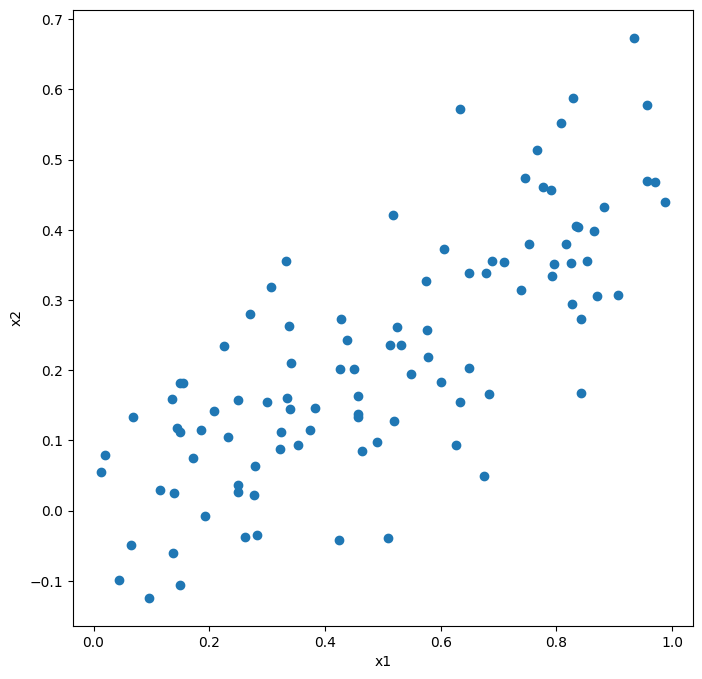

In [114]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x1, x2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In the joint model the outlier effects the results more than the individual models. 

100

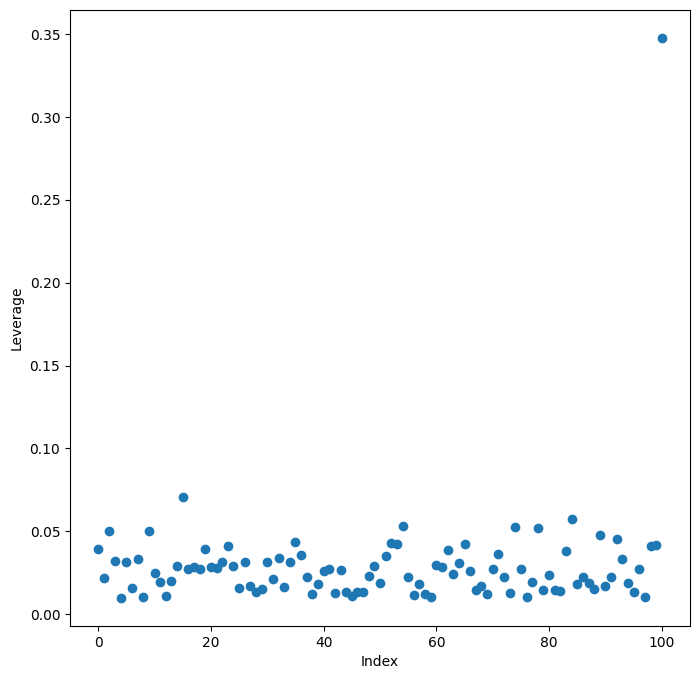

In [115]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = MS(['x1', 'x2']).fit_transform(pd.DataFrame({'x1': x1, 'x2': x2}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

infl = rand_results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

52

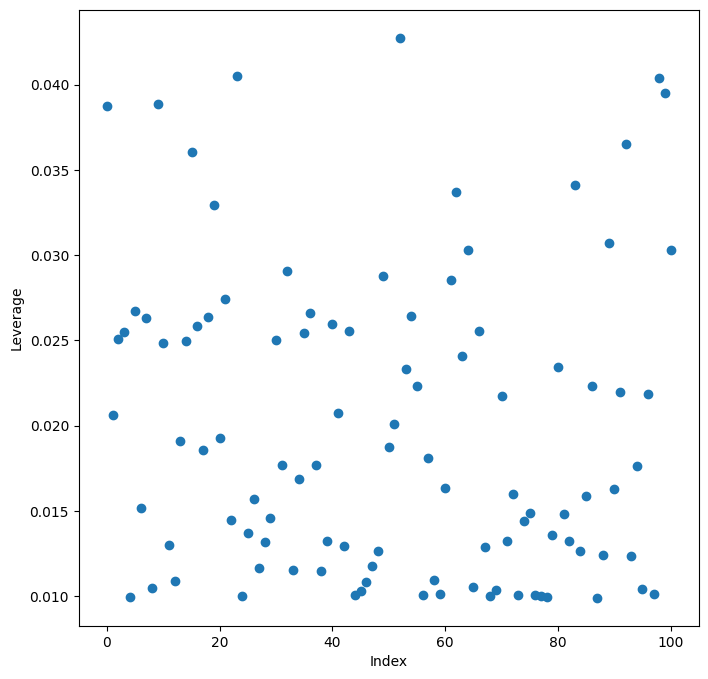

In [116]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = MS(['x1']).fit_transform(pd.DataFrame({'x1': x1}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

infl = rand_results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

100

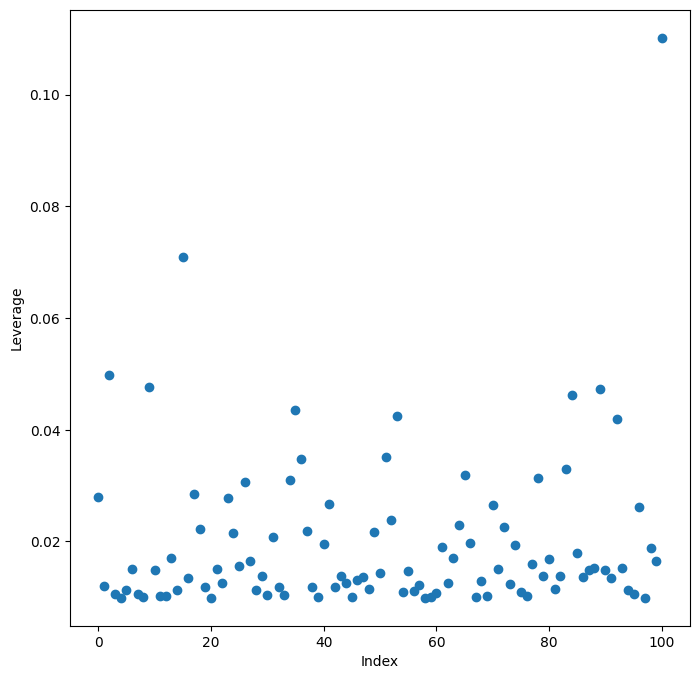

In [117]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = MS(['x2']).fit_transform(pd.DataFrame({'x2': x2}))
model_rand = sm.OLS(y, X)
rand_results = model_rand.fit(intercept=True)
summarize(rand_results)

infl = rand_results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [118]:
Boston = load_data('Boston')

In [119]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [120]:
results_ind = dict()
for predictor in Boston.columns.drop('crim'):
    X = MS([predictor]).fit_transform(Boston)
    y = Boston['crim']
    model = sm.OLS(y, X)
    pred_results = model.fit(intercept=True)
    results_ind[predictor] = pred_results
    print(predictor)
    display(summarize(pred_results))

zn


,coef,std err,t,P>|t|
intercept,4.4537,0.417,10.675,0.0
zn,-0.0739,0.016,-4.594,0.0


indus


,coef,std err,t,P>|t|
intercept,-2.0637,0.667,-3.093,0.002
indus,0.5098,0.051,9.991,0.000


chas


,coef,std err,t,P>|t|
intercept,3.7444,0.396,9.453,0.000
chas,-1.8928,1.506,-1.257,0.209


nox


,coef,std err,t,P>|t|
intercept,-13.7199,1.699,-8.073,0.0
nox,31.2485,2.999,10.419,0.0


rm


,coef,std err,t,P>|t|
intercept,20.4818,3.364,6.088,0.0
rm,-2.6841,0.532,-5.045,0.0


age


,coef,std err,t,P>|t|
intercept,-3.7779,0.944,-4.002,0.0
age,0.1078,0.013,8.463,0.0


dis


,coef,std err,t,P>|t|
intercept,9.4993,0.730,13.006,0.0
dis,-1.5509,0.168,-9.213,0.0


rad


,coef,std err,t,P>|t|
intercept,-2.2872,0.443,-5.157,0.0
rad,0.6179,0.034,17.998,0.0


tax


,coef,std err,t,P>|t|
intercept,-8.5284,0.816,-10.454,0.0
tax,0.0297,0.002,16.099,0.0


ptratio


,coef,std err,t,P>|t|
intercept,-17.6469,3.147,-5.607,0.0
ptratio,1.1520,0.169,6.801,0.0


lstat


,coef,std err,t,P>|t|
intercept,-3.3305,0.694,-4.801,0.0
lstat,0.5488,0.048,11.491,0.0


medv


,coef,std err,t,P>|t|
intercept,11.7965,0.934,12.628,0.0
medv,-0.3632,0.038,-9.460,0.0


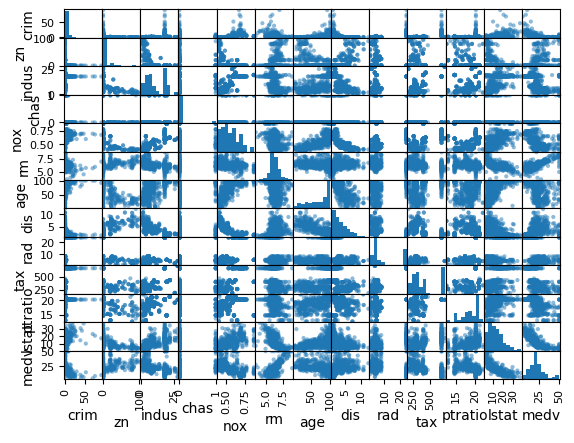

In [121]:
pd.plotting.scatter_matrix(Boston);

In [122]:
X = MS(Boston.columns.drop('crim')).fit_transform(Boston)
y = Boston['crim']
model_all = sm.OLS(y, X)
results_all = model_all.fit(intercept=True)
summarize(results_all)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


b) medv, rad, dis

In [123]:
df = summarize(results_all)
df = df.reset_index(drop=False)

In [124]:
df['coef_all'] = df['coef']
df['coef_ind'] = df['index'].apply(lambda x: results_ind[x].params[x] if x != 'intercept' else np.nan)

Text(0, 0.5, 'Individual')

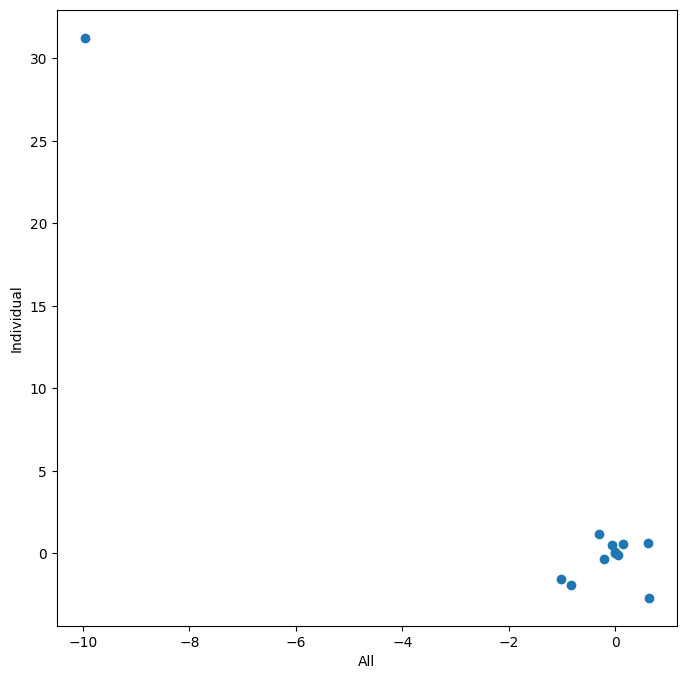

In [125]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(df['coef_all'],df['coef_ind'])
ax.set_xlabel('All')
ax.set_ylabel('Individual')

In [126]:
results_ind = dict()
for predictor in Boston.columns.drop('crim'):
    X = MS([poly(predictor, degree=3)]).fit_transform(Boston)
    y = Boston['crim']
    model = sm.OLS(y, X)
    pred_results = model.fit(intercept=True)
    results_ind[predictor] = pred_results
    print(predictor)
    display(summarize(pred_results))

zn


,coef,std err,t,P>|t|
intercept,3.6135,0.372,9.709,0.000
"poly(zn, degree=3)[0]",-38.7498,8.372,-4.628,0.000
"poly(zn, degree=3)[1]",23.9398,8.372,2.859,0.004
"poly(zn, degree=3)[2]",-10.0719,8.372,-1.203,0.230


indus


,coef,std err,t,P>|t|
intercept,3.6135,0.330,10.950,0.000
"poly(indus, degree=3)[0]",78.5908,7.423,10.587,0.000
"poly(indus, degree=3)[1]",-24.3948,7.423,-3.286,0.001
"poly(indus, degree=3)[2]",-54.1298,7.423,-7.292,0.000


chas


,coef,std err,t,P>|t|
intercept,9.971000e+12,2.100000e+13,0.475,0.635
"poly(chas, degree=3)[0]",1.173000e+13,2.470000e+13,0.475,0.635
"poly(chas, degree=3)[1]",1.249000e+14,2.630000e+14,0.475,0.635
"poly(chas, degree=3)[2]",-3.332000e+13,7.020000e+13,-0.475,0.635


nox


,coef,std err,t,P>|t|
intercept,3.6135,0.322,11.237,0.0
"poly(nox, degree=3)[0]",81.3720,7.234,11.249,0.0
"poly(nox, degree=3)[1]",-28.8286,7.234,-3.985,0.0
"poly(nox, degree=3)[2]",-60.3619,7.234,-8.345,0.0


rm


,coef,std err,t,P>|t|
intercept,3.6135,0.37,9.758,0.000
"poly(rm, degree=3)[0]",-42.3794,8.33,-5.088,0.000
"poly(rm, degree=3)[1]",26.5768,8.33,3.191,0.002
"poly(rm, degree=3)[2]",-5.5103,8.33,-0.662,0.509


age


,coef,std err,t,P>|t|
intercept,3.6135,0.349,10.368,0.000
"poly(age, degree=3)[0]",68.1820,7.840,8.697,0.000
"poly(age, degree=3)[1]",37.4845,7.840,4.781,0.000
"poly(age, degree=3)[2]",21.3532,7.840,2.724,0.007


dis


,coef,std err,t,P>|t|
intercept,3.6135,0.326,11.087,0.0
"poly(dis, degree=3)[0]",-73.3886,7.331,-10.010,0.0
"poly(dis, degree=3)[1]",56.3730,7.331,7.689,0.0
"poly(dis, degree=3)[2]",-42.6219,7.331,-5.814,0.0


rad


,coef,std err,t,P>|t|
intercept,3.6135,0.297,12.164,0.000
"poly(rad, degree=3)[0]",120.9074,6.682,18.093,0.000
"poly(rad, degree=3)[1]",17.4923,6.682,2.618,0.009
"poly(rad, degree=3)[2]",4.6985,6.682,0.703,0.482


tax


,coef,std err,t,P>|t|
intercept,3.6135,0.305,11.860,0.000
"poly(tax, degree=3)[0]",112.6458,6.854,16.436,0.000
"poly(tax, degree=3)[1]",32.0873,6.854,4.682,0.000
"poly(tax, degree=3)[2]",-7.9968,6.854,-1.167,0.244


ptratio


,coef,std err,t,P>|t|
intercept,3.6135,0.361,10.008,0.000
"poly(ptratio, degree=3)[0]",56.0452,8.122,6.901,0.000
"poly(ptratio, degree=3)[1]",24.7748,8.122,3.050,0.002
"poly(ptratio, degree=3)[2]",-22.2797,8.122,-2.743,0.006


lstat


,coef,std err,t,P>|t|
intercept,3.6135,0.339,10.654,0.000
"poly(lstat, degree=3)[0]",88.0697,7.629,11.543,0.000
"poly(lstat, degree=3)[1]",15.8882,7.629,2.082,0.038
"poly(lstat, degree=3)[2]",-11.5740,7.629,-1.517,0.130


medv


,coef,std err,t,P>|t|
intercept,3.6135,0.292,12.374,0.0
"poly(medv, degree=3)[0]",-75.0576,6.569,-11.426,0.0
"poly(medv, degree=3)[1]",88.0862,6.569,13.409,0.0
"poly(medv, degree=3)[2]",-48.0334,6.569,-7.312,0.0
